# Task 0 - Dataset Generation
- For any training of the model, a dataset needs to exist. Here I have compiled all the code i have used for generation of dataset along with the images. 

In [1]:
# Dependencies
import os
from PIL import Image, ImageDraw, ImageFont
import random
from random_word import RandomWords

In [2]:
# 100 random words for dataset
def generate_random_words(num_words):
    r = RandomWords()
    words = []
    while len(words) < num_words:
        word = r.get_random_word()
        if word and 5 <= len(word) <= 9:
            words.append(word)

    return words

words = generate_random_words(100)
print(words)

['regelate', 'forenoons', 'kittool', 'cathouses', 'phasmidae', 'lapon', 'radioiron', 'breathe', 'trent', 'radiature', 'aristo', 'prompter', 'stragular', 'skidoo', 'prisoning', 'honourers', 'wikiup', 'bunched', 'ebonies', 'duvetyns', 'unprovide', 'flacherie', 'lunaria', 'beseam', 'famine', 'suivante', 'mopuses', 'higglery', 'spell', 'libellant', 'potently', 'caldera', 'sirkar', 'snailfish', 'uncut', 'friese', 'moujik', 'gravures', 'sovprene', 'malodor', 'avidly', 'chrismon', 'unleaky', 'surquedry', 'provision', 'moroxite', 'outspan', 'blacks', 'gullage', 'sipped', 'retardive', 'asterial', 'fleeciest', 'volvate', 'cameloid', 'evolvers', 'homopolic', 'underrule', 'restuffed', 'banga', 'linum', 'kyang', 'follow', 'idoneous', 'epitomist', 'haulms', 'hamdmaid', 'lifelong', 'selenite', 'pyrectic', 'disbend', 'youngs', 'poitrels', 'mecometry', 'jauncing', 'stiller', 'unbelief', 'gatewoman', 'undefaced', 'fishberry', 'companero', 'unriven', 'arkose', 'kindness', 'lixiviate', 'fenestra', 'convey

In [3]:
def generate_easy_set():
    font_path = "Fonts/OpenSans-Regular.ttf"
    if not os.path.exists(font_path):
        raise FileNotFoundError(f"Font file not found: {font_path}")
    output_dir = "content/dataset/easy"
    os.makedirs(output_dir, exist_ok=True)
    
    for i in range(0, 100):
        for word in words:
            width, height = 248, 80
            color = 255
            image = Image.new("L", (width, height), color)
            draw = ImageDraw.Draw(image)
            try:
                font = ImageFont.truetype(font_path, 36)
            except OSError as e:
                print(f"Error loading font: {e}")
                return
            text = word.title()
            text_bbox = font.getbbox(word)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]
            # random positioning
            x = random.randint((width - text_width)//8, 7*((width - text_width)//8))
            y = random.randint((height - text_height)//8, 7*((height - text_height)//8))
            position = (x, y)
            text_color = 0
            draw.text(position, text, font=font, fill=text_color)
            image.save(os.path.join(output_dir, f"{word}_{i}.png"))

This generates the images of below format with the following features.
- Singular text font - OpenSans-Regular.ttf
- The text color is fixed to be black and background to be white. (grayscale)
- The text is not centered and is randomly positioned in the image.

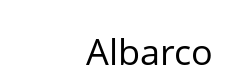

In [4]:
image = Image.open("static/albarco_0.png")
display(image)

In [6]:
def add_noise(draw, width, height):
    for _ in range(random.randint(4000, 5000)):
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        color = tuple(random.randint(0, 255) for _ in range(3))
        draw.point((x, y), fill=color)

FONTS = [
    "Fonts/akira.ttf",
    "Fonts/dejavu-sans-bold.ttf",
    "Fonts/Roboto-Italic.ttf",
    "Fonts/Roboto.ttf",
    "Fonts/Harabara.ttf",
    "Fonts/Designer.ttf",
    "Fonts/OpenSans-Italic.ttf",
    "Fonts/OpenSans-Regular.ttf"
]
def generate_hard_set():
    for i in range(0,200):
        for word in words:
            width, height = 248, 80
            # generate image with white only
            img = Image.new("RGB", (width, height), color="white")
            draw = ImageDraw.Draw(img)
            
            # generate fonts with random fonts and colors
            font = ImageFont.truetype(random.choice(FONTS), size = 30)
            text_color = tuple(random.randint(0, 255) for _ in range(3))
            
            # generate fonts with random capitalization
            word_variation = ''.join(random.choice([c.upper(), c.lower()]) for c in word)
            text_bbox = font.getbbox(word)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            position = ((width - text_width) // 2, (height - text_height) // 2)

            draw.text(position, word_variation, fill=text_color, font=font)

            # Add noise
            add_noise(draw, width, height)

            img.save(os.path.join("content/dataset/hard", f"{word}_{i}.png"))
            

This generates the images of below format with the following features.
- Multiple text fonts
- The text color is not fixed but background is fixed to be white.
- The text is centered.
- Random Capitalization
- Noise is added in the form of random dots of random colors in varying positions.

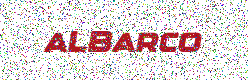

In [15]:
image = Image.open("static/albarco_1.png")
display(image)

In [16]:
def add_gray_noise(draw, width, height):
    for _ in range(random.randint(4000, 5000)):
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        gray_value = random.randint(0, 255)  # Single grayscale intensity
        draw.point((x, y), fill=gray_value)

def generate_grayhard_set():
    for i in range(0,200):
        for word in words:
            width, height = 248, 80
            img = Image.new("L", (width, height), color=255)  # "L" mode for grayscale
            draw = ImageDraw.Draw(img)
            
            # Generate fonts with random selection
            font = ImageFont.truetype(random.choice(FONTS), size=30)
            
            # Grayscale text color (single intensity for R, G, and B)
            gray_text_color = random.randint(0, 255)
            
            # Generate random capitalization
            word_variation = ''.join(random.choice([c.upper(), c.lower()]) for c in word)
            text_bbox = font.getbbox(word)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            position = ((width - text_width) // 2, (height - text_height) // 2)

            draw.text(position, word_variation, fill=gray_text_color, font=font)

            # Add grayscale noise
            add_gray_noise(draw, width, height)

            # Save image
            img.save(os.path.join("content/dataset/grayhard", f"{word}_{i}.png"))

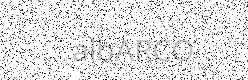

In [17]:
image = Image.open("static/albarco_2.png")
display(image)

In [18]:
def generate_grayhardblacktext_set():
    for i in range(0,200):
        for word in words:
            width, height = 248, 80
            img = Image.new("L", (width, height), color=255)  # "L" mode for grayscale
            draw = ImageDraw.Draw(img)
            
            # Generate fonts with random selection
            font = ImageFont.truetype(random.choice(FONTS), size=30)
            
            # Grayscale text color (single intensity for R, G, and B)
            gray_text_color = 0
            
            # Generate random capitalization
            word_variation = ''.join(random.choice([c.upper(), c.lower()]) for c in word)
            text_bbox = font.getbbox(word)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            position = ((width - text_width) // 2, (height - text_height) // 2)

            draw.text(position, word_variation, fill=gray_text_color, font=font)

            # Add grayscale noise
            add_gray_noise(draw, width, height)

            # Save image
            img.save(os.path.join("content/dataset/grayhardblacktext", f"{word}_{i}.png"))


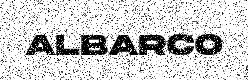

In [19]:
image = Image.open("static/albarco_3.png")
display(image)

### Generating the Bonus Set
The bonus set has the same features as the hard set with the added complexity of different color backgrounds and text generation.
- Images with green background have the text in the normal order of left ro right
- Images with red background have the text in reversed order of right to left.
- The images have only black text

In [20]:
def generate_bonus_set():
    for i in range(0, 200):
        for word in words:
            width, height = 248, 80
            bg_color = random.randint(0, 1)
            if bg_color == 0 :
                bg = "green"
            else :
                bg = "red"

            img = Image.new("RGB", (width, height), color=bg)
            draw = ImageDraw.Draw(img)

            font = ImageFont.truetype(random.choice(FONTS), size=30)
            text_color = "black"

            word_variation = ''.join(random.choice([c.upper(), c.lower()]) for c in word)
            text_bbox = font.getbbox(word)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            position = ((width - text_width) // 2, (height - text_height) // 2)

            if bg_color == 1:
                final_word = word_variation [::-1]
            else :
                final_word = word_variation

            draw.text(position, final_word, fill=text_color, font=font)

            # Add noise
            add_noise(draw, width, height)

            img.save(os.path.join("content/dataset/bonus", f"{word}_{i}.png"))

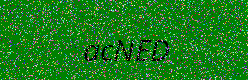

In [21]:
image = Image.open("static/acned_9.png")
display(image)

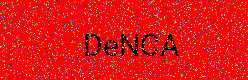

In [22]:
image = Image.open("static/acned_11.png")
display(image)